In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

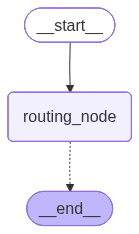

In [6]:
from multimodal_api.agent.graph import graph
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))


In [7]:
import asyncio
from langgraph.runtime import Runtime
from langchain_core.messages import HumanMessage
from langchain_core.runnables import RunnableConfig

from multimodal_api.agent.mcp_client import get_mcp_client
from multimodal_api.agent.state import VideoAgentState, Context


In [8]:
async for message_chunk, metadata in graph.astream(
    {"messages": [HumanMessage(content="need video info")]},
    context={"mcp_client":get_mcp_client()},
    stream_mode="messages",
):
    if message_chunk.content:
        print(message_chunk.content, end="|", flush=True)


2025-10-30 17:54:58.186 | INFO     | multimodal_api.agent.nodes.router:routing_node:9 - Routing node invoked. Last user message: need video info
2025-10-30 17:54:59.903 | DEBUG    | multimodal_api.agent.nodes.router:routing_node:18 - Model output: {"use_tool":"True"}
2025-10-30 17:54:59.917 | INFO     | multimodal_api.agent.nodes.router:routing_node:20 - Routing node token usage: (total=1784)
2025-10-30 17:54:59.918 | SUCCESS  | multimodal_api.agent.nodes.router:routing_node:22 - âœ… Routing decision: use_tool=True â†’ tool_selector_node
